# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Hadid Ramadhan
- **Email:** m283b4ky1661@bangkit.academy
- **ID Dicoding:** Hadid Ramadhan

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak mendapat ulasan positif berdasarkan review score?
- Bagaimana performa pembelian tiap produk?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
products = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
order_review = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
orders_item = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv')
orders_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
products_review = pd.merge(
    left=order_review,
    right=orders_item,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

products_review = pd.merge(
    left=products_review,
    right=products,
    on='product_id'
)
products_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,79.79,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,149.00,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,179.99,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0


In [7]:
buying_perform = pd.merge(
    left=orders_item,
    right=products,
    on="product_id"
)
buying_perform.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


**Insight:**
- Terdapat 3 tabel yaitu tabel product_dataset, order_reviews_dataset, order_items_dataset, kemudian digabung menjadi satu berdasarkan atribut product_id
- Menghasilkan 2 tabel gabungan, yaitu tabel product_review dan buying_perform

### Assessing Data

### Tabel product

In [8]:
products_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   review_id                   112372 non-null  object 
 1   order_id                    112372 non-null  object 
 2   review_score                112372 non-null  int64  
 3   review_comment_title        13434 non-null   object 
 4   review_comment_message      47642 non-null   object 
 5   review_creation_date        112372 non-null  object 
 6   review_answer_timestamp     112372 non-null  object 
 7   order_item_id               112372 non-null  int64  
 8   product_id                  112372 non-null  object 
 9   seller_id                   112372 non-null  object 
 10  shipping_limit_date         112372 non-null  object 
 11  price                       112372 non-null  float64
 12  freight_value               112372 non-null  float64
 13  product_catego

In [9]:
products_review.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,98938
review_comment_message,64730
review_creation_date,0
review_answer_timestamp,0
order_item_id,0
product_id,0
seller_id,0


In [10]:
print("Jumlah duplikasi: ", products_review.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
products_review.describe()

,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112372.000000,112372.000000,112372.000000,112372.000000,110774.000000,110774.000000,110774.000000,112354.000000,112354.000000,112354.000000,112354.000000
mean,4.032473,1.196010,120.378962,19.977752,48.777583,786.793932,2.207124,2090.610882,30.152198,16.576811,23.001210
std,1.387849,0.691243,182.152386,15.781421,10.025179,651.609498,1.719787,3748.608093,16.139323,13.437792,11.707552
min,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,4.000000,1.000000,39.900000,13.070000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,5.000000,1.000000,74.900000,16.250000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,5.000000,1.000000,134.900000,21.150000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Tabel Buying Perform

In [12]:
buying_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_category_name       111047 non-null  object 
 8   product_name_lenght         111047 non-null  float64
 9   product_description_lenght  111047 non-null  float64
 10  product_photos_qty          111047 non-null  float64
 11  product_weight_g            112632 non-null  float64
 12  product_length_cm           112632 non-null  float64
 13  product_height

In [13]:
buying_perform.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,1603
product_name_lenght,1603
product_description_lenght,1603


In [14]:
print("Jumlah duplikasi: ", buying_perform.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
buying_perform.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Pada tabel product_review terdapat missing value tanpa duplikasi
- Pada tabel buying_perform terdapat missing value tanpa duplikasi

### Cleaning Data

In [16]:
products_review['product_category_name'] = products_review['product_category_name'].fillna('Unknown')

In [17]:
products_review = products_review.drop(['product_name_lenght',
                                        'product_description_lenght',
                                        'product_photos_qty',
                                        'product_weight_g',
                                        'product_length_cm',
                                        'product_height_cm',
                                        'product_width_cm'], axis=1)

In [18]:
products_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,esporte_lazer
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,esporte_lazer
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30,informatica_acessorios
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12,informatica_acessorios
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,ferramentas_jardim


In [19]:
buying_perform['product_category_name'] = buying_perform['product_category_name'].fillna('Unknown')

In [20]:
buying_perform = buying_perform.drop(['product_name_lenght',
                                      'product_description_lenght',
                                      'product_photos_qty',
                                      'product_weight_g',
                                      'product_length_cm',
                                      'product_height_cm',
                                      'product_width_cm'], axis=1)

In [21]:
buying_perform.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim


In [22]:
products_review.review_score.value_counts()

,count
review_score,
5,63525
4,21315
1,14235
3,9423
2,3874


In [23]:
buying_per_product = buying_perform.product_category_name.value_counts()
buying_per_product

,count
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
...,...
cds_dvds_musicais,14
la_cuisine,14
pc_gamer,9


**Insight:**
- Pada tabel product_review dilakukan drop attribut pada kolom tidak penting untuk menghilangkan beberapa missing value.
- Pada tabel buying_perform dilakukan drop attribut pada kolom tidak penting untuk menghilangkan beberapa missing value.

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
products_review.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
count,112372,112372,112372.000000,13434,47642,112372,112372,112372.000000,112372,112372,112372,112372.000000,112372.000000,112372
unique,97709,97917,NaN,4497,35692,633,97547,NaN,32789,3090,92643,NaN,NaN,74
top,e8236fe7b6e1bdd513a500de361e2b87,5a3b1c29a49756e75f1ef513383c0c12,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-07-30 14:19:07,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,NaN,NaN,cama_mesa_banho
freq,21,22,NaN,471,254,516,21,NaN,524,2020,22,NaN,NaN,11137
mean,NaN,NaN,4.032473,NaN,NaN,NaN,NaN,1.196010,NaN,NaN,NaN,120.378962,19.977752,NaN
std,NaN,NaN,1.387849,NaN,NaN,NaN,NaN,0.691243,NaN,NaN,NaN,182.152386,15.781421,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.070000,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,74.900000,16.250000,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,NaN


array([[<Axes: title={'center': 'review_score'}>,
        <Axes: title={'center': 'order_item_id'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>]], dtype=object)

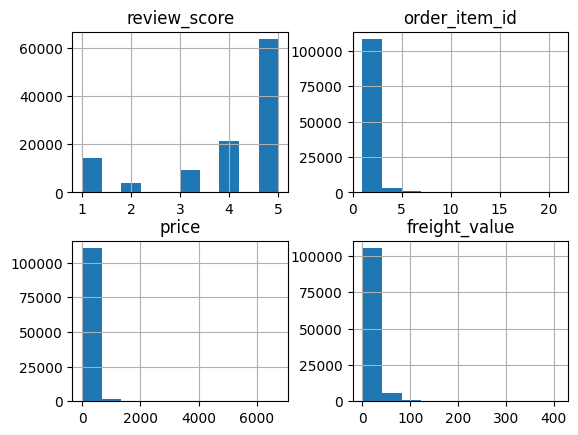

In [25]:
products_review.hist()

In [26]:
products_review_res = products_review.groupby(by="product_category_name")['review_score'].mean().sort_values(ascending=True).reset_index()
products_review_res

,product_category_name,review_score
0,seguros_e_servicos,2.500000
1,fraldas_higiene,3.256410
2,portateis_cozinha_e_preparadores_de_alimentos,3.266667
3,pc_gamer,3.333333
4,moveis_escritorio,3.493183
...,...,...
69,flores,4.419355
70,construcao_ferramentas_ferramentas,4.444444
71,livros_interesse_geral,4.446266
72,fashion_roupa_infanto_juvenil,4.500000


In [27]:
buying_perform.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650
unique,98666,NaN,32951,3095,93318,NaN,NaN,74
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,cama_mesa_banho
freq,21,NaN,527,2033,21,NaN,NaN,11115
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,NaN


array([[<Axes: title={'center': 'order_item_id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'freight_value'}>, <Axes: >]],
      dtype=object)

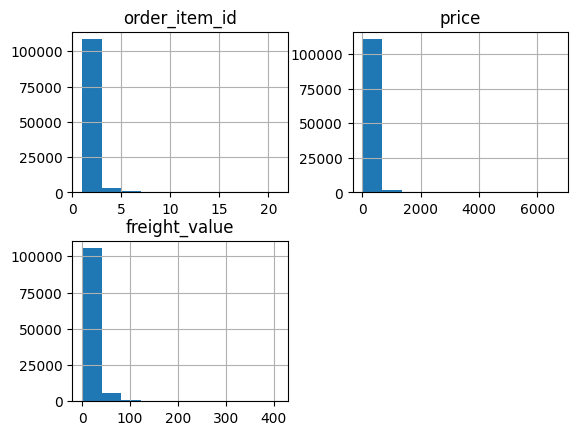

In [28]:
buying_perform.hist()

In [29]:
buying_perform_res = buying_perform.groupby(by="product_category_name")['order_id'].nunique().sort_values(ascending=False).reset_index()
buying_perform_res

,product_category_name,order_id
0,cama_mesa_banho,9417
1,beleza_saude,8836
2,esporte_lazer,7720
3,informatica_acessorios,6689
4,moveis_decoracao,6449
...,...,...
69,la_cuisine,13
70,cds_dvds_musicais,12
71,pc_gamer,8
72,fashion_roupa_infanto_juvenil,8


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

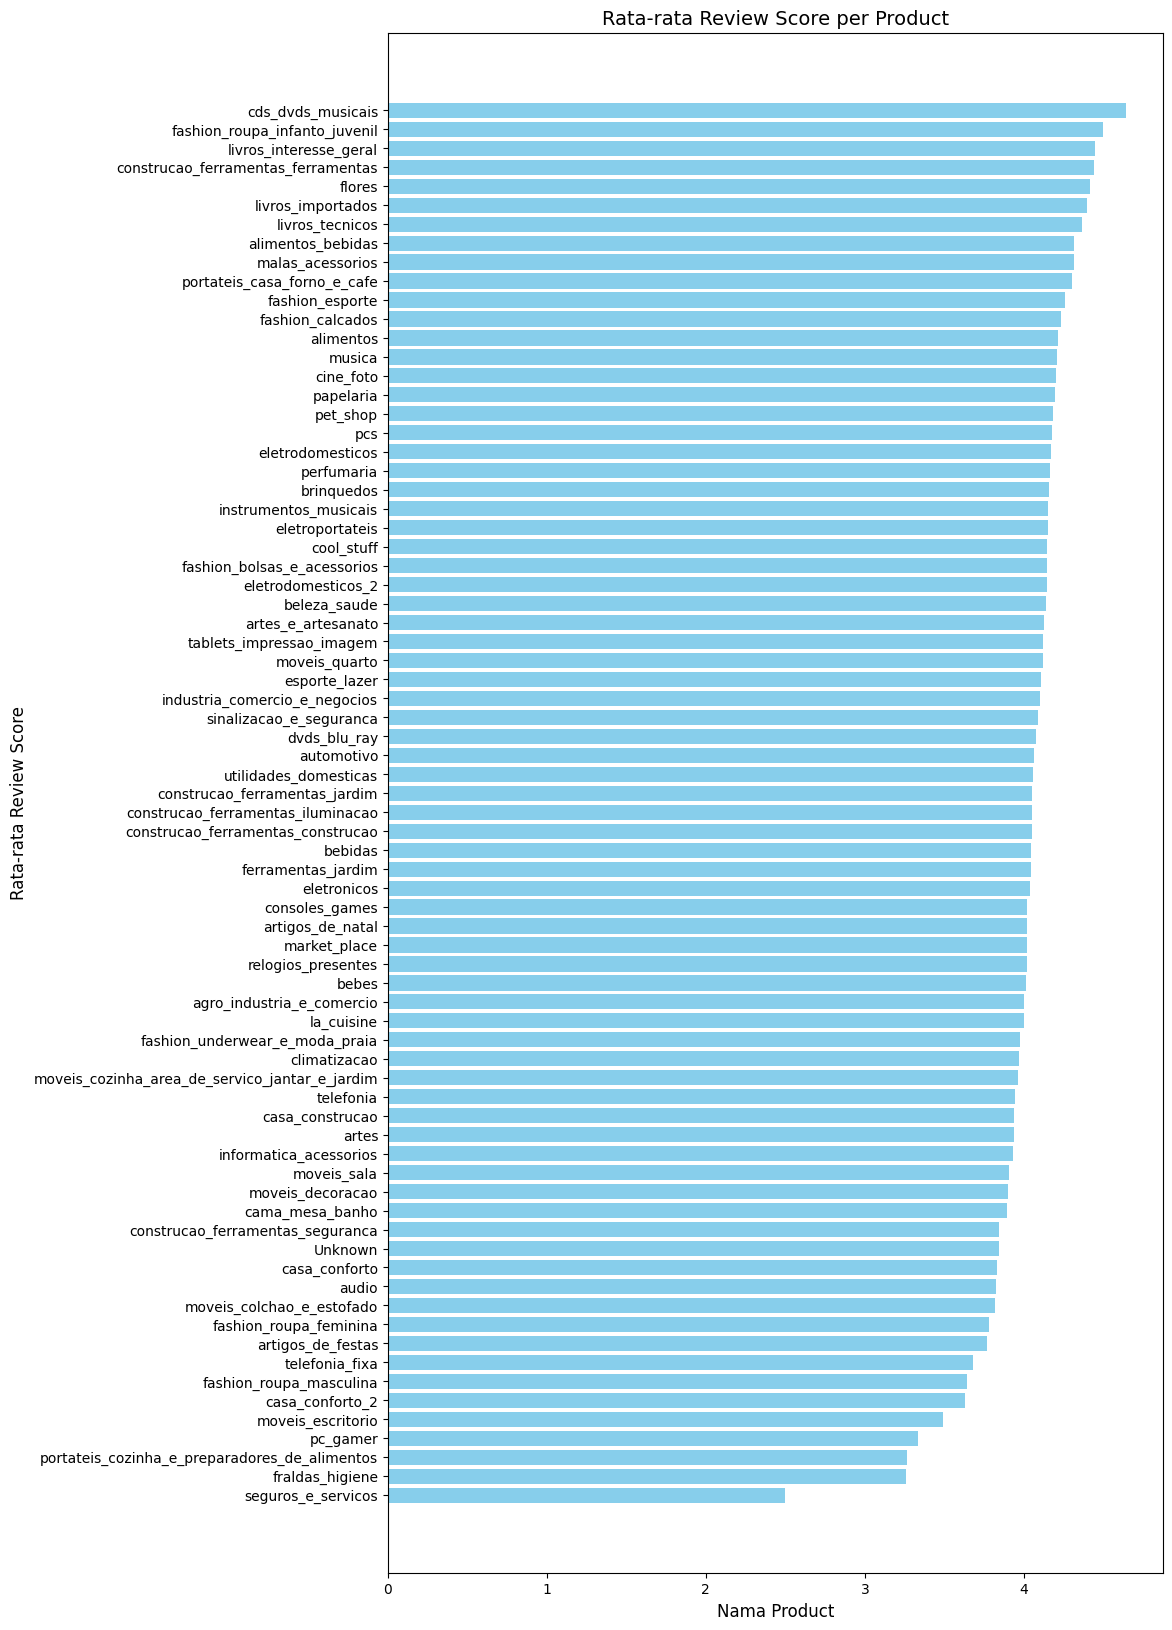

In [30]:
plt.figure(figsize=(10, 20))
plt.barh(products_review_res['product_category_name'], products_review_res['review_score'], color='skyblue')

plt.title('Rata-rata Review Score per Product', fontsize=14)
plt.xlabel('Nama Product', fontsize=12)
plt.ylabel('Rata-rata Review Score', fontsize=12)

plt.show()

### Pertanyaan 2:

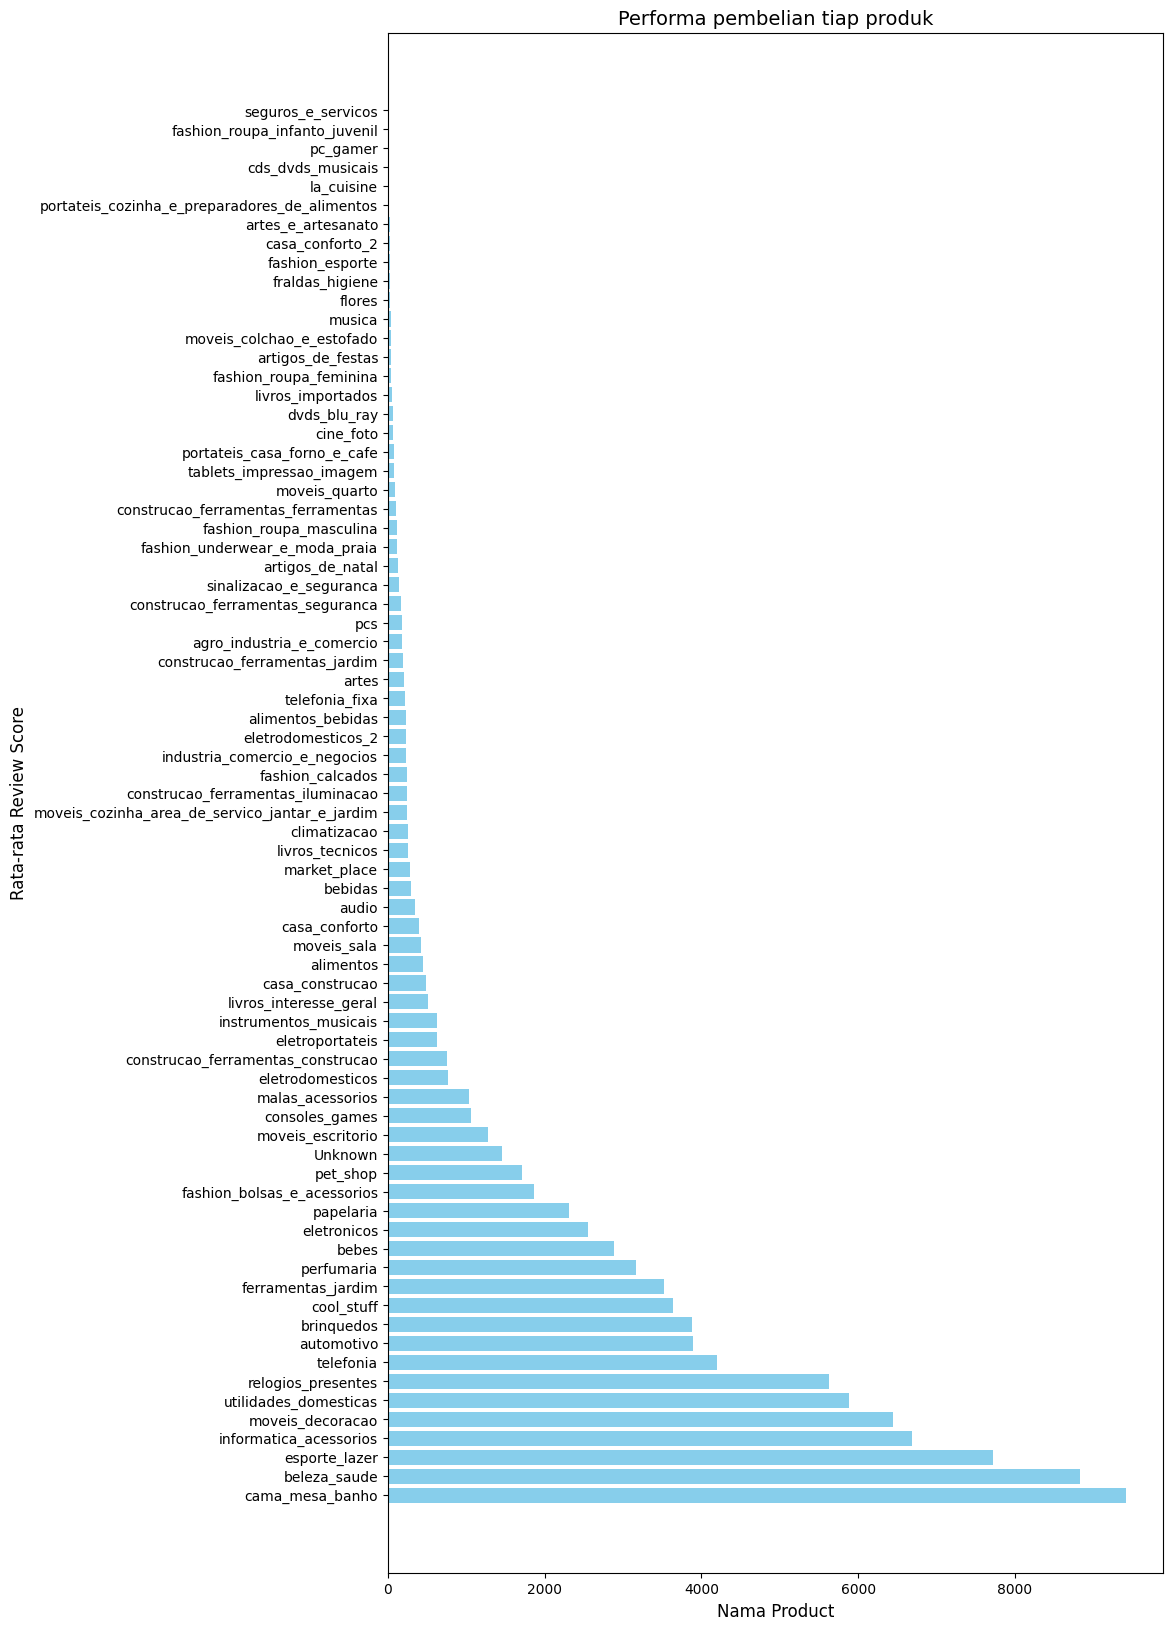

In [31]:
plt.figure(figsize=(10, 20))
plt.barh(buying_perform_res["product_category_name"], buying_perform_res["order_id"], color='skyblue')

plt.title('Performa pembelian tiap produk', fontsize=14)
plt.xlabel('Nama Product', fontsize=12)
plt.ylabel('Rata-rata Review Score', fontsize=12)

plt.show()

In [32]:
products_review.to_csv("all_data.csv", index=False)

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Produk yang memiliki rata-rata ulasan paling baik adalah cds dvds musicais
- Conclution pertanyaan 2 : Produk dengan pembelian terbanyak adalah cama mesa banho, sedangkan yang terendah adalah serguros e servicos